In [1]:
# まずは全てインポート
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_provider import least_busy
print('notebook ready')

notebook ready


In [2]:
IBMProvider.save_account(token='apiKey',overwrite=True)
hub = 'ibm-q'
group = 'open'
project = 'main'
provider = IBMProvider(instance=f"{hub}/{group}/{project}")
#print(provider.backends())
backend = least_busy(provider.backends(simulator=False))
print(backend)

<IBMBackend('ibm_osaka')>


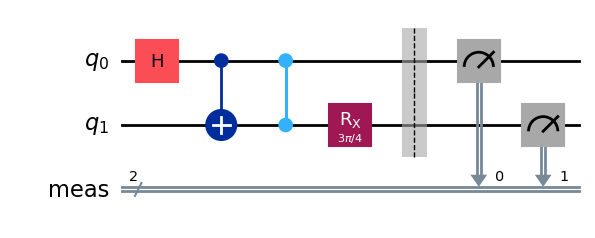

In [3]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.cz(0, 1)
circuit.rx(3. * np.pi / 4., 1)
circuit.measure_all()
circuit.draw('mpl')

In [4]:
shot = 1000
result = backend.run(circuit, shots=shot).result()
plot_histogram(result.get_counts(), title='Bell-State counts')